#### Basis of given features Build a model to check wheather en employeee will left the company or not 

#### import required libraries

In [110]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Load the DataSet

In [2]:
hr = pd.read_csv('D:\\Datasets\\HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Analyse Data

In [3]:
print('Number of Rows in Dataset : ', hr.shape[0])
print('Number of Columns in Dataset : ', hr.shape[1])

Number of Rows in Dataset :  14999
Number of Columns in Dataset :  10


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
print('Head of DataSet : ')
hr.head()

Head of DataSet : 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Statistical Description :-

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This is interesting to look at statistics, how different the features are.  The values of min, max, mean are vary a lot.
This is going to be be better result by using scaling the data.

#### Correlation between features

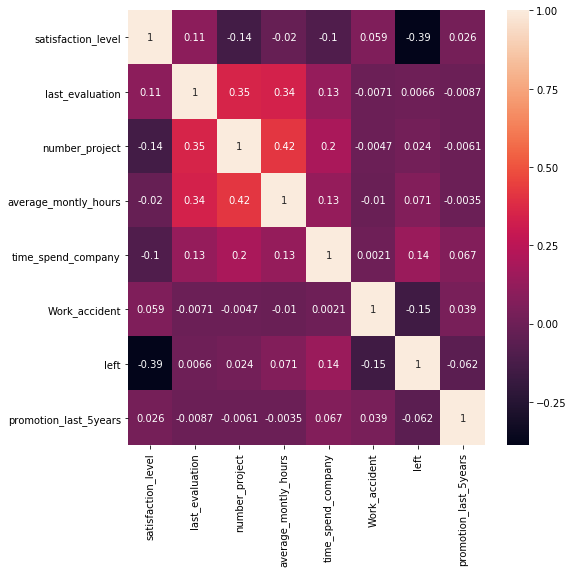

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data=hr.corr(method='pearson'), annot=True)

This is interesting to see the correlation graph of features that there is no any features that are highly correlate. 
It means that each fearure are independent to each other.

#### Visulaizing the Data

#### Freaquency distribution of each numeric type feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CFB5639B0>,
      dtype=object)

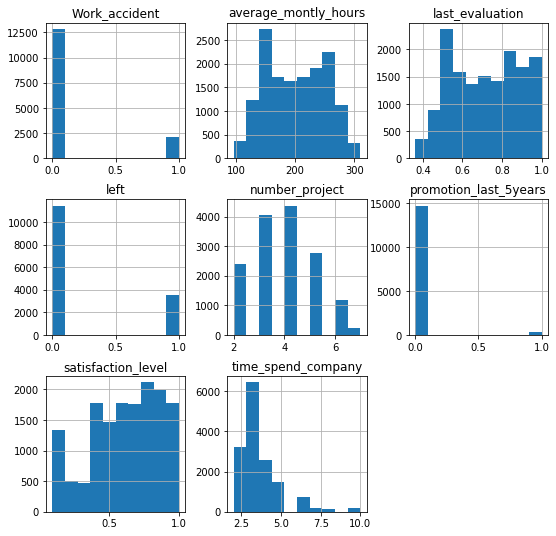

In [8]:
hr.hist(figsize=(9,9) )

#### Density Distribution of data of each numeric type Feature

[]

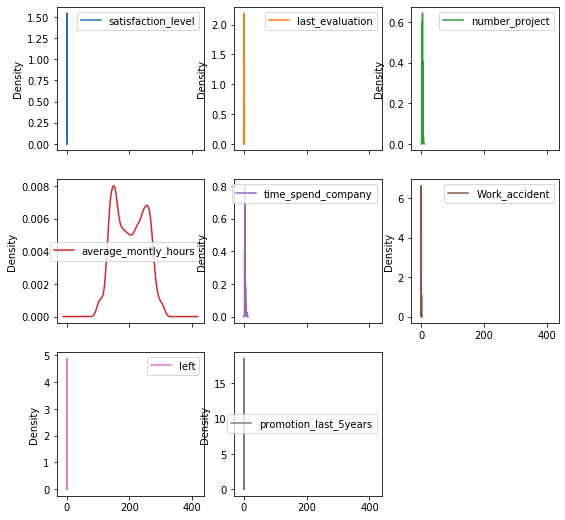

In [9]:
hr.plot(kind='density', layout=(3,3), subplots=True, figsize=(9,9))
plt.plot()

#### Distribution of data of each numeric type Feature

satisfaction_level          AxesSubplot(0.125,0.657941;0.227941x0.222059)
last_evaluation          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
number_project           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
average_montly_hours        AxesSubplot(0.125,0.391471;0.227941x0.222059)
time_spend_company       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Work_accident            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
left                           AxesSubplot(0.125,0.125;0.227941x0.222059)
promotion_last_5years       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

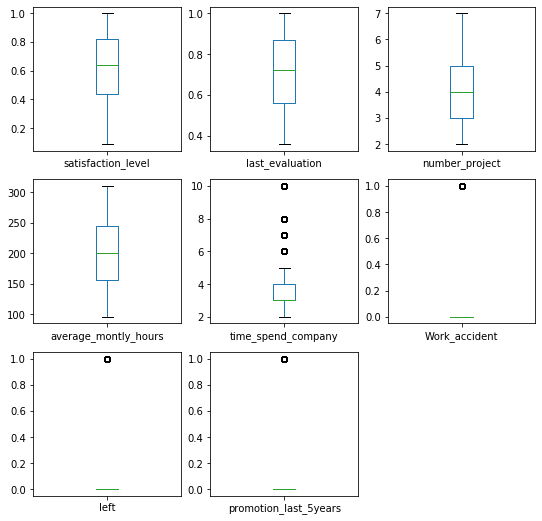

In [10]:
hr.plot(kind='box', layout=(3,3), subplots=True, figsize=(9,9))


#### Distribution of categorical data

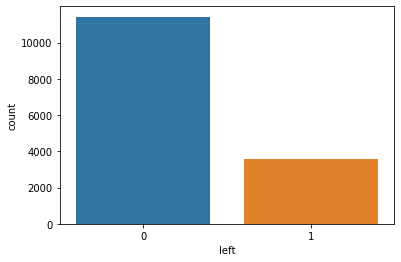

In [11]:
sns.countplot(x='left', data=hr)

In [12]:
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

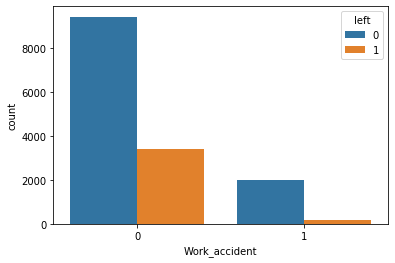

In [13]:
sns.countplot(x = 'Work_accident', hue='left', data=hr)

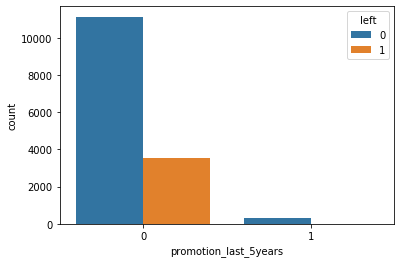

In [14]:
sns.countplot(x = 'promotion_last_5years', hue='left', data=hr)

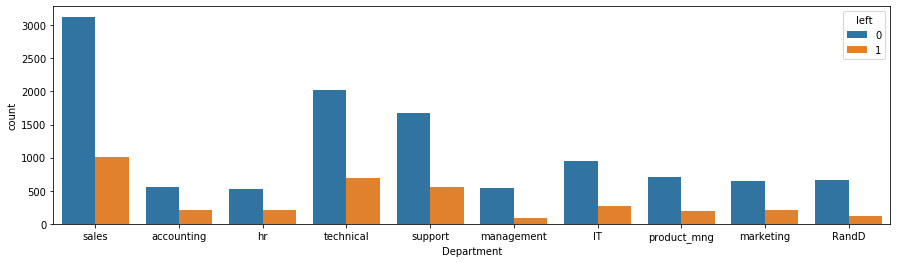

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(x = 'Department', hue='left', data=hr)

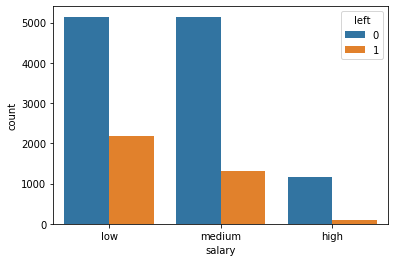

In [16]:
sns.countplot(x = 'salary', hue='left', data=hr)

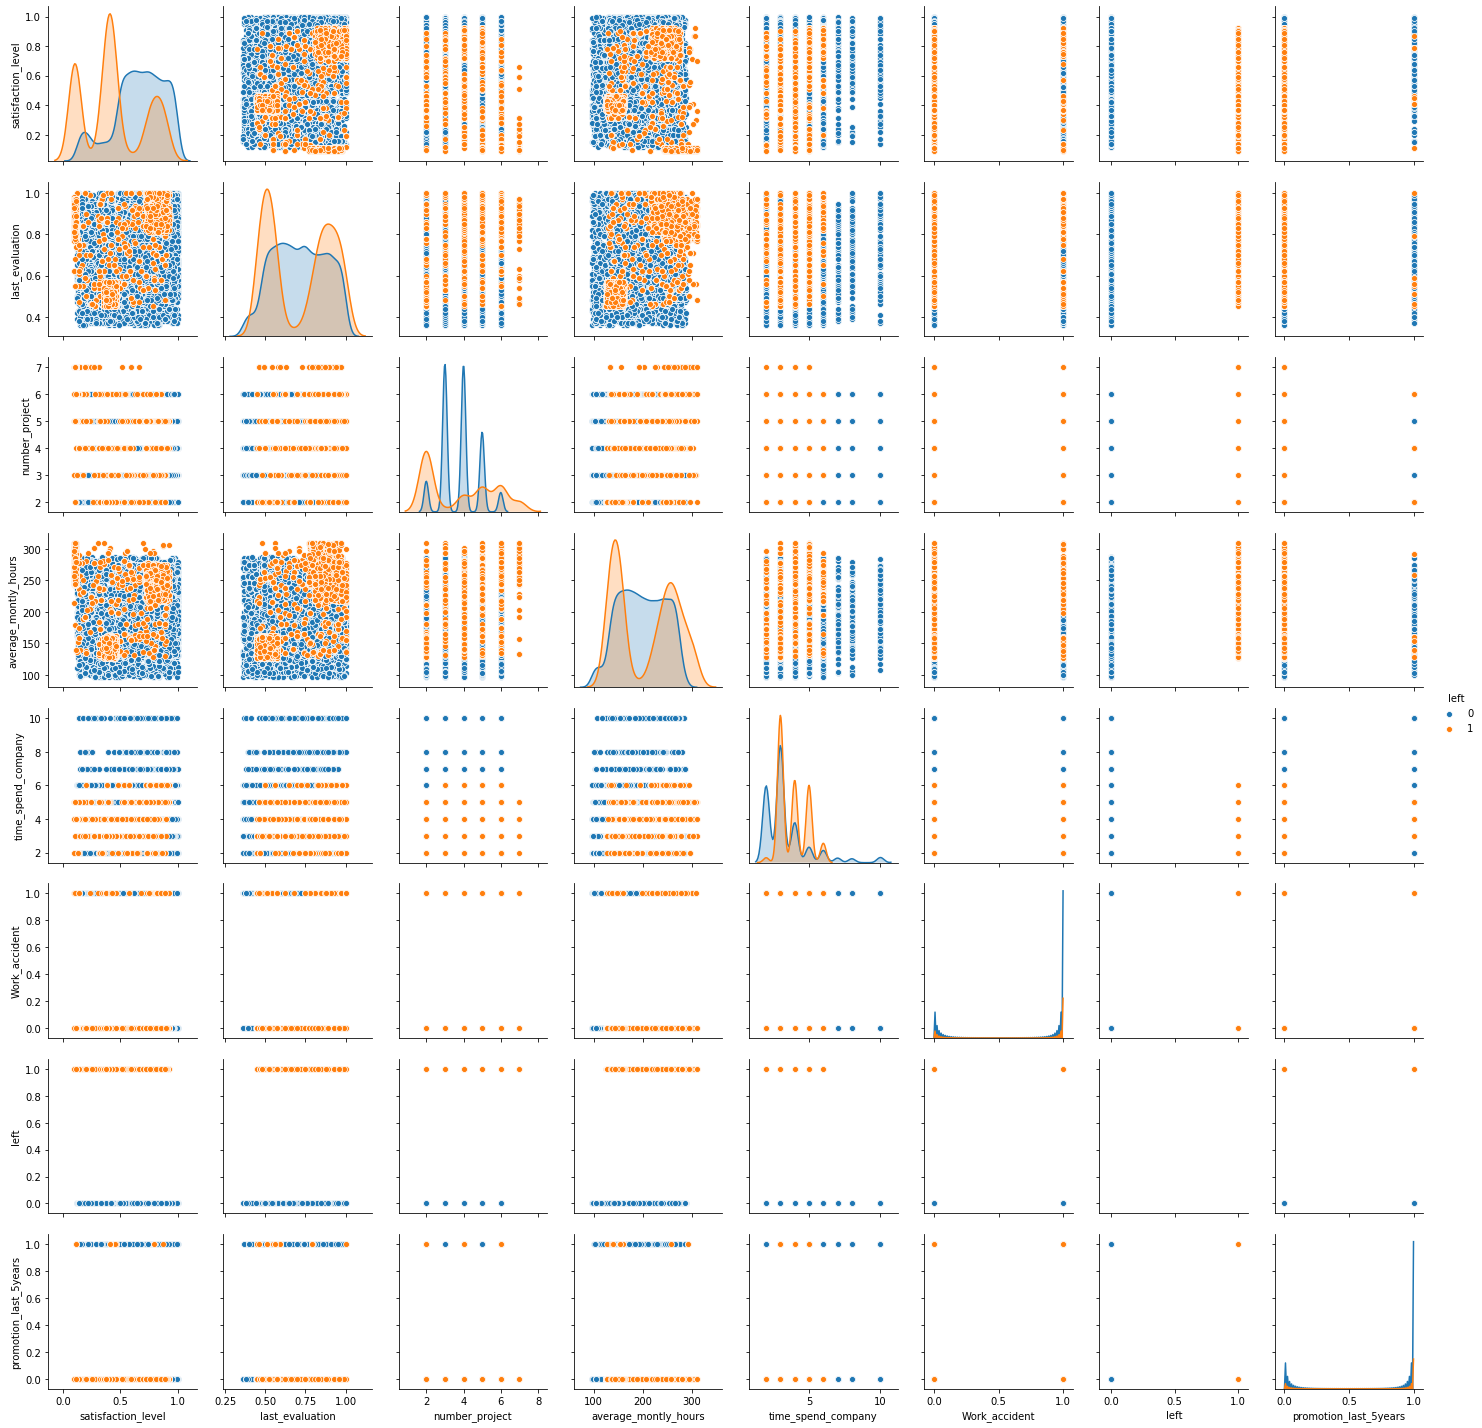

In [17]:
sns.pairplot(data=hr, hue='left')

#### Data processing 

In [18]:
department_dummy = pd.get_dummies(data=hr['Department'], drop_first=True)

In [19]:
hr.drop(labels='Department', axis=1, inplace=True)

In [20]:
hr = pd.concat([hr, department_dummy], axis=1, )

In [21]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


#### Encode the object type feature

In [22]:
le = LabelEncoder()

In [23]:
hr['salary'] = le.fit_transform(hr['salary'])

In [24]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Split the Dataset into train and test 

In [25]:
x = hr.drop(labels='left', axis=1)
y = hr['left']

In [26]:
seed = 4
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state =seed)

In [27]:
print('size of train_x : ', train_x.shape)
print('size of train_y : ', train_y.shape)

print('size of test_x :  ', test_x.shape)
print('size of test_y :  ', test_y.shape)

size of train_x :  (11999, 17)
size of train_y :  (11999,)
size of test_x :   (3000, 17)
size of test_y :   (3000,)


#### Evaluate the Algorithms:

We have no idea which algorithms is good for this problem.
We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is.

In [28]:
models = []
models.append(('logistic_regression', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('Decision_tree', DecisionTreeClassifier()))
models.append(('random_forest', RandomForestClassifier()))
models.append(('svm', SVC()))

In [29]:
results = []
names = []
for name, model in models:
    kflod = KFold(n_splits=10, random_state=seed)
    cv_result = cross_val_score(estimator=model, X=train_x, y=train_y, cv=kflod, scoring='accuracy',)
    results.append(cv_result)
    names.append(name)
    print(f' model {name} :---  mean : {cv_result.mean()}  std : {cv_result.std()}')

 model logistic_regression :---  mean : 0.7652305393383374  std : 0.007946675959398549
 model knn :---  mean : 0.9361615234917988  std : 0.007941113543607626
 model Decision_tree :---  mean : 0.975915137614679  std : 0.005531771190106848
 model random_forest :---  mean : 0.9872487489574645  std : 0.002663817102421667
 model svm :---  mean : 0.9489959688629414  std : 0.007998665316973042


 Here we fit our model on unscaled data without any huperparameter tunning.
 Here we get Random forest is good for unscaled data with  98.7% mean accuracy with 0.26% Standard deviation.
 After this Decision Tree is also good with 97.5% mean accuracy with 0.55% Standard deviation. 

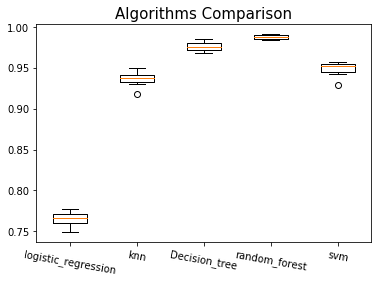

In [46]:
plt.boxplot(results, )
plt.xticks(np.arange(len(names))+1, names, rotation=-10)
plt.title('Algorithms Comparison', fontsize = 15)
plt.show()

#### Pipeline
Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together

In [54]:
pipelines = []
pipelines.append(('Scaled_logistic_regression', Pipeline([('scaler', StandardScaler()), 
                                                          ('logistic_regression', LogisticRegression())
                                                         ])
                 ))
pipelines.append(('Scaled_knn', Pipeline([('scaler', StandardScaler()), 
                                          ('knn', KNeighborsClassifier())
                                        ])
                 ))
pipelines.append(('Scaled_Decision_tree', Pipeline([('scaler', StandardScaler()), 
                                                    ('Decision_tree', DecisionTreeClassifier())
                                                  ])
                 ))
pipelines.append(('Scaled_random_forest', Pipeline([('scaler', StandardScaler()),
                                                   ('random_forest', RandomForestClassifier())
                                                   ])
                 ))
pipelines.append(('Scaled_svm', Pipeline([('scaler', StandardScaler()),
                                         ('svm', SVC())
                                         ])
                 ))

In [55]:
results = []
names = []
for name, model in pipelines:
    kflod = KFold(n_splits=10, random_state=seed)
    cv_result = cross_val_score(estimator=model, X=train_x, y=train_y, cv=kflod, scoring='accuracy',)
    results.append(cv_result)
    names.append(name)
    print(f' model {name} :---  mean : {cv_result.mean()}  std : {cv_result.std()}')

 model Scaled_logistic_regression :---  mean : 0.764897136502641  std : 0.008540889544521384
 model Scaled_knn :---  mean : 0.9402458298582153  std : 0.00626349253579331
 model Scaled_Decision_tree :---  mean : 0.9766650681123158  std : 0.004608329601073137
 model Scaled_random_forest :---  mean : 0.9872488184598277  std : 0.0015399401991782618
 model Scaled_svm :---  mean : 0.950496594384209  std : 0.005746686614353877


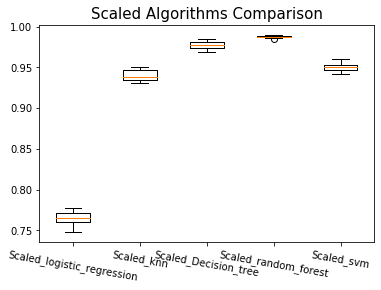

In [63]:
plt.boxplot(results, )
plt.xticks(np.arange(len(names))+1, names, rotation=-10)
plt.title('Scaled Algorithms Comparison', fontsize = 15)
plt.show()

let's compare the accuracy on scaled and unscaled algorithms.
As we can compare the knn, Svm Algorithms performs better result after scaling rather than unscaled data.
The mean accuracy is still heighest on RandomForest Algorithm (Approx Same as earlier but with less Standard deviation).
So here we will choose DecisionTree and RandomForest algorithms for Hyperparameter tunning to get the best algorithms between both of them.

#### Hyperparameter Tunning

#### Tunning Decision Tree

In [64]:
scaler = StandardScaler().fit(train_x)

In [65]:
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

In [91]:
parameter = {'criterion': ["gini", "entropy"],
             'max_depth': [50,100,150,None],
             'random_state' : [4, 10, 50,100]
            }

In [92]:
dt = DecisionTreeClassifier()

In [93]:
kflod = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=dt, param_grid=parameter, scoring='accuracy', cv=kflod,)

In [94]:
grid_result = grid.fit(scaled_train_x, train_y)

In [95]:
print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)

Best Parameter :  {'criterion': 'entropy', 'max_depth': 50, 'random_state': 4} with score :  0.9789982498541545


#### Tunning Random Forest Classifier

In [83]:
randm_frst = RandomForestClassifier()

In [86]:
randm_frst.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [97]:
parameter = {'criterion': ["gini", "entropy"],
             'max_depth': [50,100,150,None],
             'n_estimators' : [8,10,12, 15, 17],
             'random_state' : [4, 10, 50,100],
             'max_features' :["auto", "sqrt", "log2", None]
            }

In [98]:
kflod = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=randm_frst, param_grid=parameter, scoring='accuracy', cv=kflod,)

In [99]:
grid_result = grid.fit(scaled_train_x, train_y)

In [100]:
print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)

Best Parameter :  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 17, 'random_state': 10} with score :  0.9885823818651555


As Random forest shows the best Accuracy Score for this problem so will finalise RandomForestClassifier for this DataSet with obtained best Parameters

#### Finalise model

In [103]:
model = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto', n_estimators= 17, random_state= 10 )

In [105]:
model.fit(scaled_train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [106]:
prediction = model.predict(scaled_test_x)

In [109]:
print('Accuracy score :- ',accuracy_score(test_y, prediction)*100)

Accuracy score :-  99.2


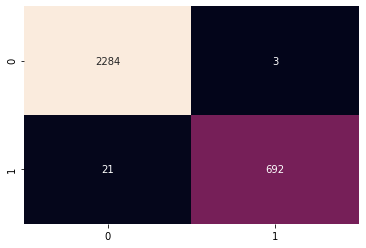

In [117]:
sns.heatmap(confusion_matrix(test_y, prediction,), annot=True, cbar=False,  fmt='0.0f' )

In [118]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2287
           1       1.00      0.97      0.98       713

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

